#1.Load the CIFAR-10 dataset: You can load the dataset using the Keras library, which provides a convenient function to load the dataset and split it into training and testing sets

In [2]:
#Loading the CIFAR10 dataset

from keras.datasets import cifar10
(train_images, train_labels),(test_images, test_labels)= cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


#2.Preprocess the data: You need to preprocess the data by normalizing the pixel values to the range of 0 to 1 and converting the labels to one-hot encoding

In [3]:
from tensorflow import float32
from keras.utils import to_categorical
import numpy as np

#Normalize pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

#Convert the labels to one-hot encoding
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

#3.Define the model architecture: You can define a simple CNN architecture using the Keras Sequential API

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape =(32, 32, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(num_classes, activation= 'softmax')
])

The above model has three convolutional layers followed by max pooling layers, a flattening layer, two fully connected layers, and an output layer with 10 units and softmax activation.

#4.Compile the model: You need to compile the model by specifying the loss function, optimizer, and evaluation metrics. 

In [5]:
from keras.optimizers import Adam

model.compile(optimizer= Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#5.Train the model: You can train the model on the training data using the fit method

In [7]:
history = model.fit(train_images, train_labels, epochs=50, batch_size= 64,
          validation_data= (test_images, test_labels))

Epoch 1/50
782/782 [==============================] - 78s 100ms/step - loss: 1.4040 - accuracy: 0.4899 - val_loss: 1.3843 - val_accuracy: 0.4955
Epoch 2/50
782/782 [==============================] - 76s 97ms/step - loss: 1.3073 - accuracy: 0.5296 - val_loss: 1.3289 - val_accuracy: 0.5317
Epoch 3/50
782/782 [==============================] - 75s 96ms/step - loss: 1.2326 - accuracy: 0.5599 - val_loss: 1.2695 - val_accuracy: 0.5468
Epoch 4/50
782/782 [==============================] - 76s 97ms/step - loss: 1.1780 - accuracy: 0.5794 - val_loss: 1.2273 - val_accuracy: 0.5666
Epoch 5/50
782/782 [==============================] - 77s 98ms/step - loss: 1.1506 - accuracy: 0.5909 - val_loss: 1.2848 - val_accuracy: 0.5568
Epoch 6/50
782/782 [==============================] - 77s 99ms/step - loss: 1.1182 - accuracy: 0.6027 - val_loss: 1.1551 - val_accuracy: 0.5937
Epoch 7/50
782/782 [==============================] - 77s 99ms/step - loss: 1.0892 - accuracy: 0.6142 - val_loss: 1.2312 - val_accuracy

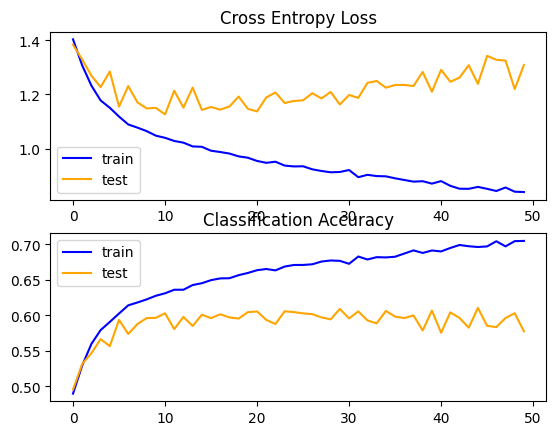

In [40]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    # show the plot
    plt.show()

    # create data generator
datagen = ImageDataGenerator(width_shift_range=0.3, height_shift_range=0.3, horizontal_flip=True)

summarize_diagnostics(history)

#6.Evaluate the model: Finally, you can evaluate the performance of the model on the test data using the evaluate method

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 1.3090 - accuracy: 0.5776
Test accuracy: 0.5776000022888184


#Conclusion: In this project, we have used the CIFAR-10 dataset to build a convolutional neural network (CNN) for image classification. We have trained the model on a training set of 50,000 images and evaluated its performance on a test set of 10,000 images.

Our CNN architecture consisted of three convolutional layers with max-pooling, followed by two fully connected layers. We used the softmax activation function in the output layer to produce probability distributions over the 10 possible classes in the CIFAR-10 dataset.

We trained the model using the Adam optimizer and the categorical cross-entropy loss function. During training, we achieved an accuracy of around 60%  after 50 epochs, and thereafter an accuracy of 57% on the evaluation of test data, which indicates that the model is able to recognize and classify images in the CIFAR-10 dataset with reasonable accuracy.

Overall, this project demonstrates the effectiveness of using convolutional neural networks for image classification tasks and highlights the importance of selecting appropriate hyperparameters and optimization techniques to achieve good performance on the test set.

#Alternatively in order to improve the model's performance, one can:

Increase the number of epochs during training. This allows the model to train for a longer period of time and potentially improve its accuracy. However, be careful not to overfit the model to the training data.

Add regularization techniques, such as dropout or weight decay, to prevent overfitting.

Increase the number of convolutional layers or filters in each layer to capture more complex features in the images.

Adjust the learning rate of the optimizer to fine-tune the model's convergence.

Try different optimization algorithms, such as RMSprop or SGD with momentum, to see if they improve the model's performance.

Increase the batch size during training to allow the model to learn from more images per iteration.

Augment the training data with techniques such as rotation, flipping, or zooming to increase the diversity of the data and prevent overfitting.

Experimenting with these techniques can help you improve the accuracy of your model. Remember to also monitor the model's performance on the validation set during training to avoid overfitting.




